In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as stats
import requests

In [201]:
hpi_data = pd.read_csv('../data/hpi_master.csv')
hpi_data

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.89
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.96
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.30
...,...,...,...,...,...,...,...,...,...,...
131535,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,224.60,222.49
131536,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,3,233.67,225.97
131537,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,4,229.75,235.53
131538,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2025,1,232.20,238.16


hpi_data contains the raw dataset from https://www.fhfa.gov/data/hpi/datasets?tab=master-hpi-data(historical

The FHFA HPI® is a comprehensive​ collection of publicly available house price indexes that measure changes in single-family home values based on data that extend back to the mid-1970s from all 50 states and over 400 American cities.

Contained in this dataset is information by state, area of the country, city, etc. Depending on which portion is reviewed, the data goes back to the mid-70's (as metioned above). Other metrics start in Q1 1991 and include the 100 largest metropolitan areas within the United States, and states with an initial housing index starting at 100 where 101 would represent a 1% increase from the previous year. I am interested in the "purchase-only" data from the "hpi_flavor" column as this is the traditional index.  Also, since this data covers 35 years and is reported quarterly, I will omit Q2-Q4 each year to keep the data displayed on the visuals easier to view. The end result will still be the same. In order to review this specific data I will need to create a new dataframe 



The initial questions I have for this data set are:

What has the percent increase looked like in Louisville, KY during the past 35 years?

How does Louisville compare vs the rest of the state?

How does the increase compare to other metropolitan areas of similar size?

What is the average increase for other metroplitan areas similar to Louisville?

Where does Louisville rank among the 100 largest metropolitan areas in terms of the increase?

Where does Kentucky rank among other states?

I would also like to obtain data showing average houshold income over the same period of time to compare income to housing cost. This is the ultimate question I have. How affordable is housing today compared to 1991? Have wages kept up with, exceeded, or fallen behind the price of a home?

In [202]:
#The only rows I am looking for are the rows containing "purchase-only" in the "hpi_flavor" column
#Below code to determine all values present in the "hpi_flavor" column
print(hpi_data['hpi_flavor'].unique().tolist())

['purchase-only', 'all-transactions', 'expanded-data']


In [203]:
#code to remove rows containing 'all-transactions' and 'expanded-data' in the 'hpi_flavor' column
flavors_to_remove = ['all-transactions', 'expanded-data']
pattern = '|'.join(flavors_to_remove)
hpi_data = hpi_data[~hpi_data['hpi_flavor'].str.contains(pattern, na=False)]
#verify rows containing 'all-transactions' and 'expanded-data' in the 'hpi_flavor' column have been removed
print(hpi_data['hpi_flavor'].unique().tolist())
hpi_data

['purchase-only']


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.89
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.96
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.30
...,...,...,...,...,...,...,...,...,...,...
131535,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,224.60,222.49
131536,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,3,233.67,225.97
131537,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,4,229.75,235.53
131538,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2025,1,232.20,238.16


In [204]:
#Next I need to see what fields are present in the "hpi_type" column
print(hpi_data['hpi_type'].unique().tolist())

['traditional', 'manufactured', 'distress-free', 'developmental']


In [205]:
#I will be removing everything except 'traditional' from the 'hpi_type' column
type_to_remove = ['manufactured', 'distress-free', 'developmental']
pattern = '|'.join(type_to_remove)
hpi_data = hpi_data[~hpi_data['hpi_type'].str.contains(pattern, na=False)]
#verify only rows containing 'traditional' in the 'hpi_type' column are present 
print(hpi_data['hpi_type'].unique().tolist())
hpi_data

['traditional']


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.89
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.96
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.30
...,...,...,...,...,...,...,...,...,...,...
123426,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,2,423.92,417.06
123427,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,3,425.12,420.51
123428,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,4,424.60,426.21
123429,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2025,1,428.50,429.40


In [206]:
#rows 0-4160 are on a separate metric (monthly as opposed to quarterly) than the rest of the dataset
#remove rows 0-4160
hpi_data.drop(hpi_data.index[0:4160], inplace=True)
hpi_data

C:\Users\ryanh\AppData\Local\Temp\ipykernel_40244\2184701859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpi_data.drop(hpi_data.index[0:4160], inplace=True)


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
101213,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1991,1,100.00,100.00
101214,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1991,2,99.86,100.32
101215,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1991,3,100.20,100.39
101216,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1991,4,99.83,98.77
101217,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1992,1,102.83,102.90
...,...,...,...,...,...,...,...,...,...,...
123426,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,2,423.92,417.06
123427,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,3,425.12,420.51
123428,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,4,424.60,426.21
123429,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2025,1,428.50,429.40


In [ ]:
# Next to remove the rows containing Q2, Q3, and Q4
# The quarter is contained within the 'period' colum and is listed as either '1', '2', '3', or '4'
# I will only be looking at Q1 for each year to reduce the data pints on visuals while still maintaining the total

hpi_data = hpi_data[hpi_data.period != 2]
hpi_data = hpi_data[hpi_data.period != 3]
hpi_data = hpi_data[hpi_data.period != 4]
#verify only rows containing 'traditional' in the 'hpi_type' column are present 
print(hpi_data['period'].unique().tolist())
hpi_data 

[1]


,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
101213,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1991,1,100.00,100.00
101217,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1992,1,102.83,102.90
101221,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1993,1,101.90,102.12
101225,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1994,1,97.75,98.12
101229,traditional,purchase-only,quarterly,MSA,"Albany-Schenectady-Troy, NY",10580,1995,1,95.79,96.29
...,...,...,...,...,...,...,...,...,...,...
123413,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2021,1,312.30,313.18
123417,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2022,1,369.38,370.41
123421,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2023,1,385.32,386.33
123425,traditional,purchase-only,quarterly,USA or Census Division,United States,USA,2024,1,410.94,411.92


In [208]:
#data has been cleaned to only include the hpi_type of traditional, the hpi_flavor of purchase-only, and the Q1
#index for the years 1991-2025

#The hpi_type, hpi_flavor, frequency, level, and index_sa columns can be removed at this point
hpi_data = hpi_data.drop(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'index_sa'], axis=1)
hpi_data

,place_name,place_id,yr,period,index_nsa
101213,"Albany-Schenectady-Troy, NY",10580,1991,1,100.00
101217,"Albany-Schenectady-Troy, NY",10580,1992,1,102.83
101221,"Albany-Schenectady-Troy, NY",10580,1993,1,101.90
101225,"Albany-Schenectady-Troy, NY",10580,1994,1,97.75
101229,"Albany-Schenectady-Troy, NY",10580,1995,1,95.79
...,...,...,...,...,...
123413,United States,USA,2021,1,312.30
123417,United States,USA,2022,1,369.38
123421,United States,USA,2023,1,385.32
123425,United States,USA,2024,1,410.94


Data is now ready for visualizations

In [209]:
print(hpi_data['place_name'].unique().tolist())

['Albany-Schenectady-Troy, NY', 'Albuquerque, NM', 'Allentown-Bethlehem-Easton, PA-NJ', 'Anaheim-Santa Ana-Irvine, CA (MSAD)', 'Arlington-Alexandria-Reston, VA-WV (MSAD)', 'Atlanta-Sandy Springs-Roswell, GA (MSAD)', 'Austin-Round Rock-San Marcos, TX', 'Bakersfield-Delano, CA', 'Baltimore-Columbia-Towson, MD', 'Baton Rouge, LA', 'Birmingham, AL', 'Boise City, ID', 'Boston, MA (MSAD)', 'Bridgeport-Stamford-Danbury, CT', 'Buffalo-Cheektowaga, NY', 'Cambridge-Newton-Framingham, MA (MSAD)', 'Camden, NJ (MSAD)', 'Cape Coral-Fort Myers, FL', 'Charleston-North Charleston, SC', 'Charlotte-Concord-Gastonia, NC-SC', 'Chicago-Naperville-Schaumburg, IL (MSAD)', 'Cincinnati, OH-KY-IN', 'Cleveland, OH', 'Colorado Springs, CO', 'Columbia, SC', 'Columbus, OH', 'Dallas-Plano-Irving, TX (MSAD)', 'Dayton-Kettering-Beavercreek, OH', 'Denver-Aurora-Centennial, CO', 'Des Moines-West Des Moines, IA', 'Detroit-Dearborn-Livonia, MI (MSAD)', 'Elgin, IL (MSAD)', 'El Paso, TX', 'Everett, WA (MSAD)', 'Fort Lauderda

In [210]:
#To easily view place_ids associated with areas I will create a dictionary
dictionary = hpi_data.set_index('place_name')['place_id'].to_dict()
dictionary

{'Albany-Schenectady-Troy, NY': '10580',
 'Albuquerque, NM': '10740',
 'Allentown-Bethlehem-Easton, PA-NJ': '10900',
 'Anaheim-Santa Ana-Irvine, CA (MSAD)': '11244',
 'Arlington-Alexandria-Reston, VA-WV (MSAD)': '11694',
 'Atlanta-Sandy Springs-Roswell, GA (MSAD)': '12054',
 'Austin-Round Rock-San Marcos, TX': '12420',
 'Bakersfield-Delano, CA': '12540',
 'Baltimore-Columbia-Towson, MD': '12580',
 'Baton Rouge, LA': '12940',
 'Birmingham, AL': '13820',
 'Boise City, ID': '14260',
 'Boston, MA (MSAD)': '14454',
 'Bridgeport-Stamford-Danbury, CT': '14860',
 'Buffalo-Cheektowaga, NY': '15380',
 'Cambridge-Newton-Framingham, MA (MSAD)': '15764',
 'Camden, NJ (MSAD)': '15804',
 'Cape Coral-Fort Myers, FL': '15980',
 'Charleston-North Charleston, SC': '16700',
 'Charlotte-Concord-Gastonia, NC-SC': '16740',
 'Chicago-Naperville-Schaumburg, IL (MSAD)': '16984',
 'Cincinnati, OH-KY-IN': '17140',
 'Cleveland, OH': '17410',
 'Colorado Springs, CO': '17820',
 'Columbia, SC': '17900',
 'Columbus, O

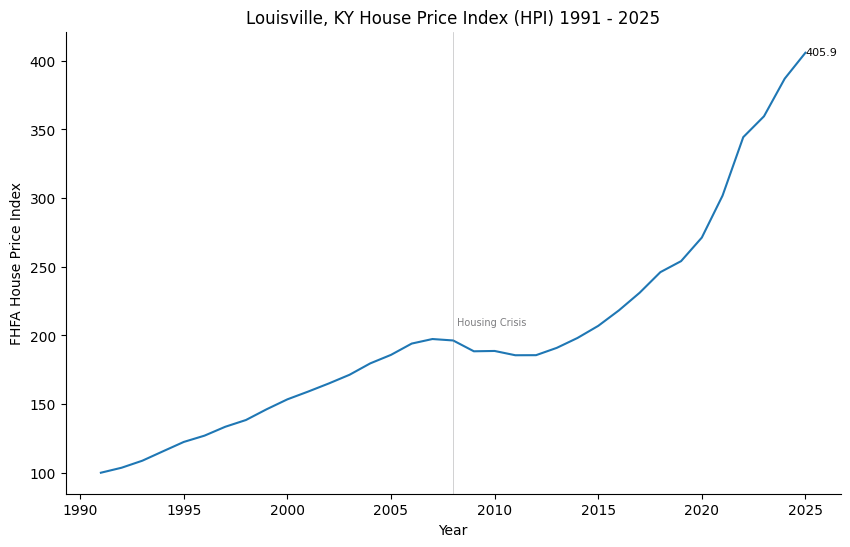

In [211]:
#line chart to show the HPI increase in Louisville, KY 1991-2025
louisville = hpi_data[hpi_data['place_id'] == '31140']
lou_yr = louisville['yr']
lou_nsa = louisville['index_nsa']

plt.figure(figsize=(10,6))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(lou_yr, lou_nsa)
plt.text(lou_yr.iloc[-1], lou_nsa.iloc[-1], f'{lou_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Year")
plt.ylabel("FHFA House Price Index")
plt.title("Louisville, KY House Price Index (HPI) 1991 - 2025")

ax.axvline(2008, color = "#7E7E81FF", linewidth = 0.5, alpha = 0.5)
ax.text(2008+0.2, 207, "Housing Crisis", color = "#7E7E81FF", fontsize = 7)

plt.show()

The chart above displays the rise in HPI in Louisville, KY from 1991-2025 and is my baseline for comparison 

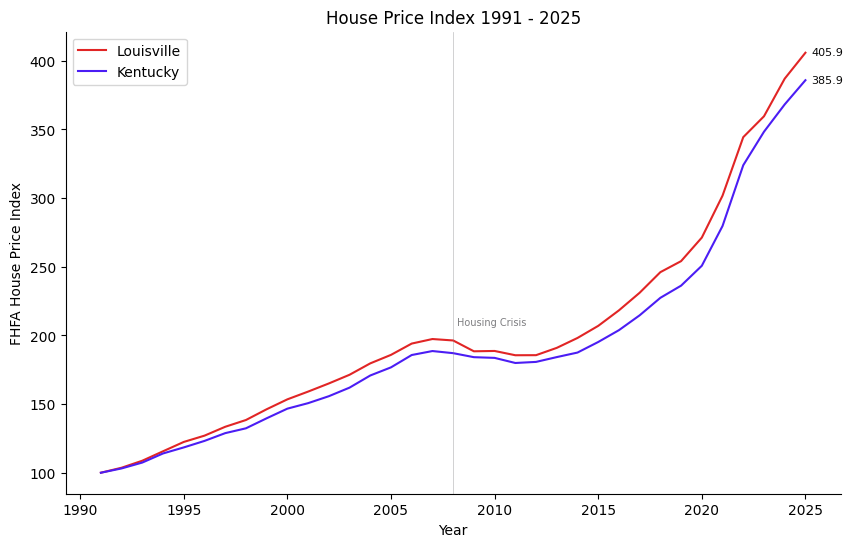

In [212]:
#compare Louisville HPI to Kentucky HPI 1991-2025
ky = hpi_data[hpi_data['place_id'] == 'KY']
ky_yr = ky['yr']
ky_nsa = ky['index_nsa']

plt.figure(figsize=(10,6))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(lou_yr, lou_nsa, color = "#e12525")
plt.plot(ky_yr, ky_nsa, color = "#4b1df4")
plt.text(lou_yr.iloc[-1] + 0.3, lou_nsa.iloc[-1], f'{lou_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(ky_yr.iloc[-1] + 0.3, ky_nsa.iloc[-1], f'{ky_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.legend(["Louisville", "Kentucky"], loc="upper left")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Year")
plt.ylabel("FHFA House Price Index")
plt.title("House Price Index 1991 - 2025")

ax.axvline(2008, color = "#7E7E81FF", linewidth = 0.5, alpha = 0.5)
ax.text(2008+0.2, 207, "Housing Crisis", color = "#7E7E81FF", fontsize = 7)

plt.show()


I can see that home prices in Louisville have gone up more than in the rest of the state 

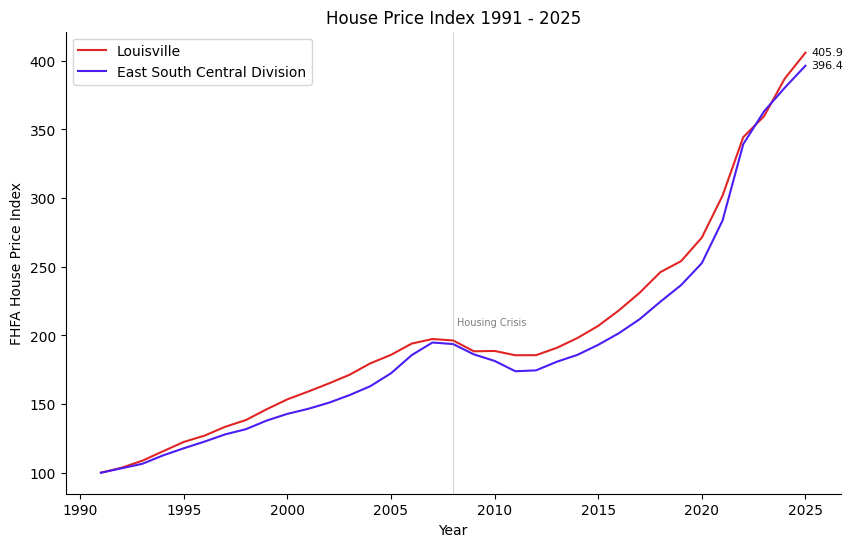

In [213]:
#compare Louisville HPI to the East South Central Division (Alabama, Kentucky, Mississippi, Tennessee) for 1991-2025
esc = hpi_data[hpi_data['place_id'] == 'DV_ESC']
esc_yr = esc['yr']
esc_nsa = esc['index_nsa']

plt.figure(figsize=(10,6))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(lou_yr, lou_nsa, color = "#e12525")
plt.plot(esc_yr, esc_nsa, color = "#4b1df4")
plt.text(lou_yr.iloc[-1] + 0.3, lou_nsa.iloc[-1], f'{lou_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(esc_yr.iloc[-1] + 0.3, esc_nsa.iloc[-1], f'{esc_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.legend(["Louisville", "East South Central Division"], loc="upper left")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Year")
plt.ylabel("FHFA House Price Index")
plt.title("House Price Index 1991 - 2025")

ax.axvline(2008, color = "#7E7E81FF", linewidth = 0.5, alpha = 0.5)
ax.text(2008+0.2, 207, "Housing Crisis", color = "#7E7E81FF", fontsize = 7)

plt.show()

In comparing Louisville to the the rest of the Census Region housing prices have increased more here then in the region as a whole

In [214]:
#Compare Louisville, KY to other metropolitan areas of similar size
#added an additional dataset from https://www.census.gov/data/tables/time-series/demo/popest/2020s-total-metro-and-micro-statistical-areas.html showing this data.

pop_data = pd.read_csv('../data/cbsa-met-est2024-pop.csv')
pop_data

,Geographic Area,2020,2021,2022,2023,2024
0,".Abilene, TX Metro Area","176,926","177,918","180,072","182,838",184278
1,".Akron, OH Metro Area","701,689","696,602","698,506","700,094",702209
2,".Albany, GA Metro Area","148,253","144,976","145,873","145,538",145451
3,".Albany, OR Metro Area","128,967","130,062","130,516","131,509",132474
4,".Albany-Schenectady-Troy, NY Metro Area","899,778","905,557","904,216","907,223",913485
...,...,...,...,...,...,...
419,".Yakima, WA Metro Area","256,736","256,743","256,566","257,193",258523
420,".York-Hanover, PA Metro Area","456,754","459,264","461,385","465,977",471240
421,".Youngstown-Warren, OH Metro Area","429,699","428,153","426,820","426,342",426086
422,".Yuba City, CA Metro Area","181,480","182,156","183,017","184,152",186014


In [215]:
# All rows in the 'Geographic Area' column start with '.'
# Remove '.' from this column

pop_data['Geographic Area'] = pop_data['Geographic Area'].str[1:]
pop_data 

,Geographic Area,2020,2021,2022,2023,2024
0,"Abilene, TX Metro Area","176,926","177,918","180,072","182,838",184278
1,"Akron, OH Metro Area","701,689","696,602","698,506","700,094",702209
2,"Albany, GA Metro Area","148,253","144,976","145,873","145,538",145451
3,"Albany, OR Metro Area","128,967","130,062","130,516","131,509",132474
4,"Albany-Schenectady-Troy, NY Metro Area","899,778","905,557","904,216","907,223",913485
...,...,...,...,...,...,...
419,"Yakima, WA Metro Area","256,736","256,743","256,566","257,193",258523
420,"York-Hanover, PA Metro Area","456,754","459,264","461,385","465,977",471240
421,"Youngstown-Warren, OH Metro Area","429,699","428,153","426,820","426,342",426086
422,"Yuba City, CA Metro Area","181,480","182,156","183,017","184,152",186014


In [216]:
# I would like to only reference the most recent population data so I will remove the 2020-2023 columns

pop_data = pop_data.drop(['2020', '2021', '2022', '2023'], axis=1)
pop_data

,Geographic Area,2024
0,"Abilene, TX Metro Area",184278
1,"Akron, OH Metro Area",702209
2,"Albany, GA Metro Area",145451
3,"Albany, OR Metro Area",132474
4,"Albany-Schenectady-Troy, NY Metro Area",913485
...,...,...
419,"Yakima, WA Metro Area",258523
420,"York-Hanover, PA Metro Area",471240
421,"Youngstown-Warren, OH Metro Area",426086
422,"Yuba City, CA Metro Area",186014


In [217]:
# To determine metropolitan areas similar in size to Louisville I will need to sort all metropolitan areas by the 2024 column

pop_data = pop_data.sort_values(by='2024', ascending=True)
pop_data

,Geographic Area,2024
61,"Carson City, NV Metro Area",58148
113,"Eagle Pass, TX Metro Area",58829
120,"Enid, OK Metro Area",62007
398,"Walla Walla, WA Metro Area",62068
214,"Lewiston, ID-WA Metro Area",65370
...,...,...
72,"Chicago-Naperville-Elgin, IL-IN Metro Area",9408576
226,".Los Angeles-Long Beach-Glendale, CA Metro Div...",9757179
271,".New York-Jersey City-White Plains, NY-NJ Metr...",12172495
224,"Los Angeles-Long Beach-Anaheim, CA Metro Area",12927614


In [218]:
pop_dictionary = pop_data.set_index('Geographic Area')['2024'].to_dict()
pop_dictionary

{'Carson City, NV Metro Area': 58148,
 'Eagle Pass, TX Metro Area': 58829,
 'Enid, OK Metro Area': 62007,
 'Walla Walla, WA Metro Area': 62068,
 'Lewiston, ID-WA Metro Area': 65370,
 'Minot, ND Metro Area': 75938,
 'Grand Island, NE Metro Area': 77278,
 'Casper, WY Metro Area': 80410,
 'Elmira, NY Metro Area': 81115,
 'Midland, MI Metro Area': 84022,
 'Kokomo, IN Metro Area': 84082,
 'Great Falls, MT Metro Area': 84523,
 'Columbus, IN Metro Area': 84741,
 'Parkersburg-Vienna, WV Metro Area': 87681,
 'Grants Pass, OR Metro Area': 88276,
 'Hinesville, GA Metro Area': 89046,
 'Pocatello, ID Metro Area': 91010,
 'Fairbanks-College, AK Metro Area': 94951,
 'Helena, MT Metro Area': 96735,
 'Cape Girardeau, MO-IL Metro Area': 98862,
 'Corvallis, OR Metro Area': 98899,
 'Victoria, TX Metro Area': 99170,
 'Dubuque, IA Metro Area': 99242,
 'Hot Springs, AR Metro Area': 99902,
 'Decatur, IL Metro Area': 100737,
 'Lima, OH Metro Area': 100866,
 'Rome, GA Metro Area': 101390,
 'Cheyenne, WY Metro A

In [219]:
# get 2024 population for Louisville from dictionary

print(pop_dictionary['Louisville/Jefferson County, KY-IN Metro Area'])

1394234


In [220]:
# get metropolitan areas with a population of 100000 less and 100000 greater than Louisville for comparison

for area, population in pop_dictionary.items():
    if population >= 1294232 and population <= 1494234:
        print({area}) 

{'Salt Lake City-Murray, UT Metro Area'}
{'.Camden, NJ Metro Division'}
{'Memphis, TN-MS-AR Metro Area'}
{'Richmond, VA Metro Area'}
{'.Frederick-Gaithersburg-Bethesda, MD Metro Division'}
{'Louisville/Jefferson County, KY-IN Metro Area'}
{'.Marietta, GA Metro Division'}


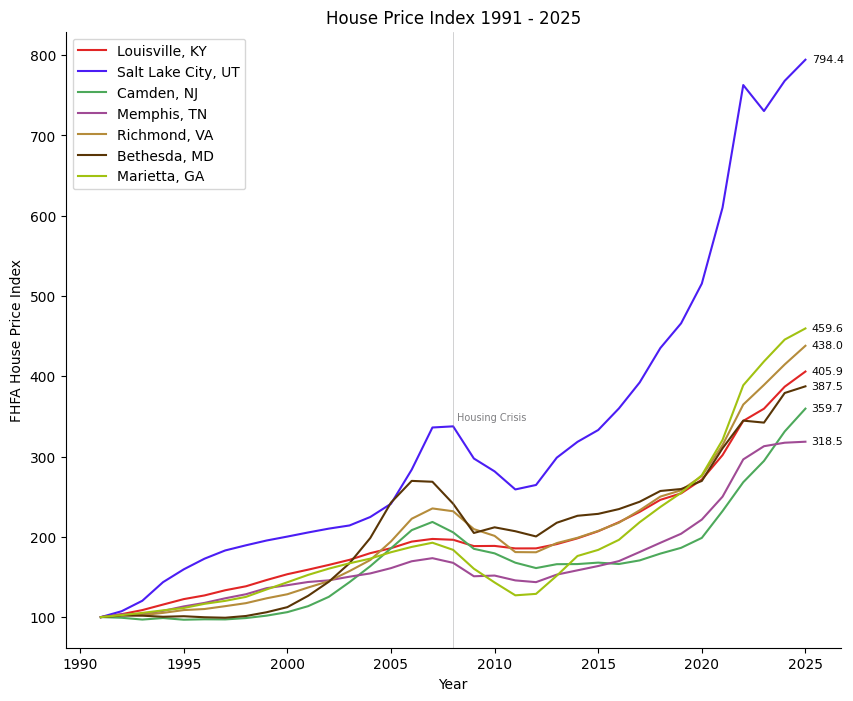

In [221]:
# Compare the cities listed with similar populations to Louisville
slc = hpi_data[hpi_data['place_id'] == '41620']
slc_yr = slc['yr']
slc_nsa = slc['index_nsa']

cam = hpi_data[hpi_data['place_id'] == '15804']
cam_yr = cam['yr']
cam_nsa = cam['index_nsa']

mem = hpi_data[hpi_data['place_id'] == '32820']
mem_yr = mem['yr']
mem_nsa = mem['index_nsa']

ric = hpi_data[hpi_data['place_id'] == '40060']
ric_yr = ric['yr']
ric_nsa = ric['index_nsa']

fgb = hpi_data[hpi_data['place_id'] == '23224']
fgb_yr = fgb['yr']
fgb_nsa = fgb['index_nsa']

mar = hpi_data[hpi_data['place_id'] == '31924']
mar_yr = mar['yr']
mar_nsa = mar['index_nsa']

plt.figure(figsize=(10,8))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(lou_yr, lou_nsa, color = "#e12525")
plt.plot(slc_yr, slc_nsa, color = "#4b1df4")
plt.plot(cam_yr, cam_nsa, color = "#4DA95B")
plt.plot(mem_yr, mem_nsa, color = "#a04b95")
plt.plot(ric_yr, ric_nsa, color = "#b58c3b")
plt.plot(fgb_yr, fgb_nsa, color = "#593506")
plt.plot(mar_yr, mar_nsa, color = "#a1c211")

plt.text(lou_yr.iloc[-1] + 0.3, lou_nsa.iloc[-1], f'{lou_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(slc_yr.iloc[-1] + 0.3, slc_nsa.iloc[-1], f'{slc_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(cam_yr.iloc[-1] + 0.3, cam_nsa.iloc[-1], f'{cam_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(mem_yr.iloc[-1] + 0.3, mem_nsa.iloc[-1], f'{mem_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(ric_yr.iloc[-1] + 0.3, ric_nsa.iloc[-1], f'{ric_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(fgb_yr.iloc[-1] + 0.3, fgb_nsa.iloc[-1], f'{fgb_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')
plt.text(mar_yr.iloc[-1] + 0.3, mar_nsa.iloc[-1], f'{mar_nsa.iloc[-1]:.1f}', fontsize=8, color="#090808", va='center', ha='left')

plt.legend(['Louisville, KY', 'Salt Lake City, UT', 'Camden, NJ', 'Memphis, TN', 'Richmond, VA', 'Bethesda, MD', 'Marietta, GA'], loc="upper left")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Year")
plt.ylabel("FHFA House Price Index")
plt.title("House Price Index 1991 - 2025")

ax.axvline(2008, color = "#7E7E81FF", linewidth = 0.5, alpha = 0.5)
ax.text(2008+0.2, 345, "Housing Crisis", color = "#7E7E81FF", fontsize = 7)

plt.show()


This visual compares Louisvilel to metropolitan areas with a similar population (+- 100,000). Salt Lake City, UT is a significant outlier in this dataset having the largest increase in HPI among the 100 largest metropolitan areas in the United States. All seven cities of equal population all saw a sharp increase in HPI starting in 2020 with Louisville having forth highest

In [222]:
# What is the average HPI in 2025?
# new df to only display 2025 HPI
hpi_2025 = hpi_data[hpi_data['yr'] == 2025]
hpi_2025

,place_name,place_id,yr,period,index_nsa
101349,"Albany-Schenectady-Troy, NY",10580,2025,1,321.90
101487,"Albuquerque, NM",10740,2025,1,404.99
101625,"Allentown-Bethlehem-Easton, PA-NJ",10900,2025,1,333.90
101763,"Anaheim-Santa Ana-Irvine, CA (MSAD)",11244,2025,1,532.43
101901,"Arlington-Alexandria-Reston, VA-WV (MSAD)",11694,2025,1,442.66
...,...,...,...,...,...
122877,Pacific Division,DV_PAC,2025,1,466.52
123015,South Atlantic Division,DV_SA,2025,1,457.77
123153,West North Central Division,DV_WNC,2025,1,405.63
123291,West South Central Division,DV_WSC,2025,1,422.92


In [223]:
# sort 2025 HPI

hpi_2025_sorted = hpi_2025.sort_values(by='index_nsa', ascending=True)
hpi_2025_sorted

,place_name,place_id,yr,period,index_nsa
107007,"Hartford-West Hartford-East Hartford, CT",25540,2025,1,271.31
105627,"Elgin, IL (MSAD)",20994,2025,1,280.58
115977,Connecticut,CT,2025,1,300.53
112251,"Rochester, NY",40380,2025,1,304.81
105075,"Dayton-Kettering-Beavercreek, OH",19430,2025,1,304.95
...,...,...,...,...,...
118737,Montana,MT,2025,1,721.47
121221,Utah,UT,2025,1,728.18
105213,"Denver-Aurora-Centennial, CO",19740,2025,1,743.41
112803,"Salt Lake City-Murray, UT",41620,2025,1,794.36


In [ ]:
# This sorted data contains metropolitan areas, states, and geographical areas
# To look at just the metropolitan areas I will need to remove states and geographical areas
# metroplitan areas have integers as the place_id value
# remove all rows where place_id is not an integer
# place_id column is non-numeric>convert to integers and remove others 
integer_only = pd.to_numeric(hpi_2025_sorted['place_id'], errors='coerce')
hpi_2025_cities = hpi_2025_sorted[integer_only.notna() & (integer_only % 1 == 0)]
hpi_2025_cities


,place_name,place_id,yr,period,index_nsa
107007,"Hartford-West Hartford-East Hartford, CT",25540,2025,1,271.31
105627,"Elgin, IL (MSAD)",20994,2025,1,280.58
112251,"Rochester, NY",40380,2025,1,304.81
105075,"Dayton-Kettering-Beavercreek, OH",19430,2025,1,304.95
104385,"Cleveland, OH",17410,2025,1,309.74
...,...,...,...,...,...
102177,"Austin-Round Rock-San Marcos, TX",12420,2025,1,712.70
102867,"Boise City, ID",14260,2025,1,713.66
105213,"Denver-Aurora-Centennial, CO",19740,2025,1,743.41
112803,"Salt Lake City-Murray, UT",41620,2025,1,794.36


In [233]:
integers_only = pd.to_numeric(hpi_2025_sorted['index_nsa'], errors='coerce')
hpi_2025_cities = hpi_2025_sorted[integer_only.notna() & (integer_only % 1 == 0)]
print(hpi_2025_cities['index_nsa'].dtype)

float64


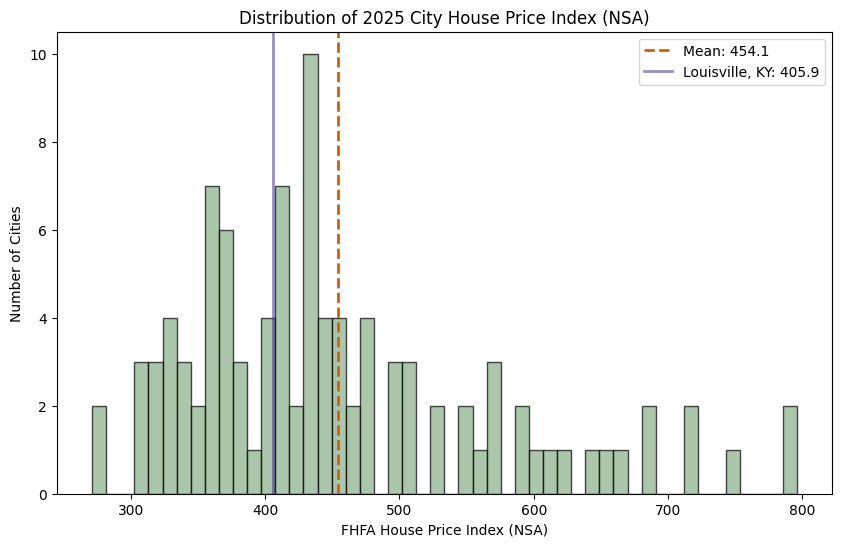

In [ ]:
#Histogram to show average HPI in 2025 across the 100 largest metropolitan areas and to see where Louisville, KY is in comparison to the average

values = hpi_2025_cities["index_nsa"]

cities_mean = hpi_2025_cities['index_nsa'].mean()
cities_median = hpi_2025_cities['index_nsa'].median()
cities_mode = hpi_2025_cities['index_nsa'].mode()

cities_mean = values.mean()
#median is not relevant since I am compairing against the average
#cities_median = values.median()
#mode is not relevant here since there are no duplicate values so this defaults to the first value
#cities_mode = values.mode().iloc[0]

plt.figure(figsize=(10, 6))

plt.hist(values, bins=50, alpha=0.7, color = "#88AF86", edgecolor="black")

plt.axvline(cities_mean, linestyle="--", color = "#ce600c", linewidth=2, label=f"Mean: {cities_mean:.1f}")
plt.axvline(405.9, linestyle = "-", color = "#2F1E94FF", linewidth = 2, alpha = 0.5, label="Louisville, KY: 405.9")
#plt.axvline(cities_median, linestyle="-", color = "#1f0c8a", linewidth=2, label=f"Median: {cities_median:.1f}")
#plt.axvline(cities_mode, linestyle="-.", color = "#0e6b20", linewidth=2, label=f"Mode: {cities_mode}")

plt.xlabel("FHFA House Price Index (NSA)")
plt.ylabel("Number of Cities")
plt.title("Distribution of 2025 City House Price Index (NSA)")
plt.legend()

plt.show()



The nationwide average comes out to an HPI of 454.1. Louisville is behind the nationwide average